<a href="https://colab.research.google.com/github/salmaelgd/Data_Analysis/blob/main/ACM_dogs_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#chargement des données
import pandas
D = pandas.read_excel("/content/drive/MyDrive/ACM.xlsx",sheet_name="Feuil1")

print(D)

   iD        Chien    Taille Velocite Affection
0   1    Beauceron  Taille++  Veloc++    Affec+
1   2       Basset   Taille-   Veloc-    Affec-
2   3   Berger All  Taille++  Veloc++    Affec+
3   4        Boxer   Taille+   Veloc+    Affec+
4   5     Bull-Dog   Taille-   Veloc-    Affec+
5   6  Bull-Mastif  Taille++   Veloc-    Affec-
6   7      Caniche   Taille-   Veloc+    Affec+
7   8     Labrador   Taille+   Veloc+    Affec+


In [ ]:
#affichage des caractéristiques
print(D.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   iD         8 non-null      int64 
 1   Chien      8 non-null      object
 2   Taille     8 non-null      object
 3   Velocite   8 non-null      object
 4   Affection  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes
None


In [ ]:
#récupération des variables actives
DActives = D[['Taille','Velocite','Affection']]
print(DActives)

     Taille Velocite Affection
0  Taille++  Veloc++    Affec+
1   Taille-   Veloc-    Affec-
2  Taille++  Veloc++    Affec+
3   Taille+   Veloc+    Affec+
4   Taille-   Veloc-    Affec+
5  Taille++   Veloc-    Affec-
6   Taille-   Veloc+    Affec+
7   Taille+   Veloc+    Affec+


In [ ]:
# Récupération des infos - nombre de variables
p = DActives.shape[1]
print(p)

# Nombre d'observations
n = DActives.shape[0]
print(n)

# Codage en 0/1 – les noms de modalités sont explicites
# Pas nécessaire de préfixer les indicatrices par les noms de variables
X = pandas.get_dummies(DActives, prefix='', prefix_sep='', dtype=int)
print(X)

#nombre total de modalités
M = X.shape[1]
print(M)

3
8
   Taille+  Taille++  Taille-  Veloc+  Veloc++  Veloc-  Affec+  Affec-
0        0         1        0       0        1       0       1       0
1        0         0        1       0        0       1       0       1
2        0         1        0       0        1       0       1       0
3        1         0        0       1        0       0       1       0
4        0         0        1       0        0       1       1       0
5        0         1        0       0        0       1       0       1
6        0         0        1       1        0       0       1       0
7        1         0        0       1        0       0       1       0
8


In [ ]:
!pip install fanalysis

In [ ]:
#analyse avec fanalysis
from fanalysis.mca import MCA

 ce code initialise et ajuste un modèle d'analyse des correspondances multiples sur notre ensemble de données DActives, puis affiche les propriétés et méthodes de l'objet ACM résultant.

In [ ]:
#instanciation
acm = MCA(row_labels=DActives.index,var_labels=DActives.columns)
acm.fit(DActives.values)

#propriétés
print(dir(acm))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_binarization', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_stats', '_compute_svd', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'c_', 'col_contrib_', 'col_coord_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_labels_short_temp_', 'col_labels_temp_', 'col_topandas', 'eig_', 'fit', 'fit_transform', 'get_metadata_routing', 'get_params', 'mapping', 'mappin

# Nombre de facteurs 1

In [ ]:
#nombre max de facteurs
Hmax = M-p

#numpy
import numpy

#valeurs propres
print(pandas.DataFrame(numpy.transpose(acm.eig_),columns=['Val.P','%','Cumul %'],index=range(1,Hmax+1)))

      Val.P          %     Cumul %
1  0.708031  42.481875   42.481875
2  0.591489  35.489362   77.971237
3  0.261992  15.719509   93.690746
4  0.069747   4.184791   97.875538
5  0.035408   2.124462  100.000000


Eboulis des valeurs propres

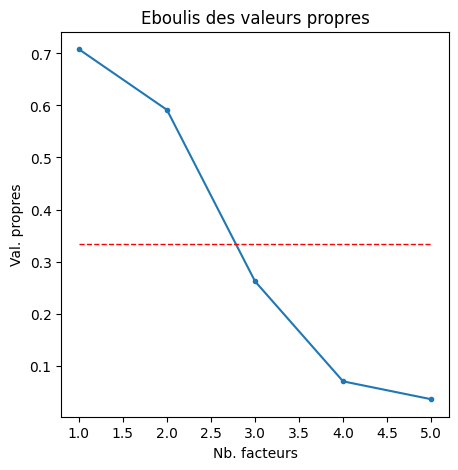

In [ ]:
#librairie graphique
import matplotlib.pyplot as plt
#éboulis des v.p.
fix,ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,Hmax+1),acm.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#seuil - Règle de Kaiser
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

# Nombre de facteurs 2 – Correction de Benzécri
Dans l'analyse des correspondances multiples, les données initiales peuvent contenir des informations redondantes. Cela signifie que certaines informations sont répétées ou corrélées, ce qui peut fausser l'interprétation des résultats
de l'ACM.


La correction de Benzécri est une méthode pour ajuster les résultats de l'ACM en tenant compte des redondances, ce qui permet une interprétation plus précise de l'inertie expliquée par chaque facteur.

In [ ]:
#récupérer les valeurs propres supérieur à (1/p)
lambada = acm.eig_[0][acm.eig_[0]>1/p]
print(lambada)

[0.70803126 0.59148936]


In [ ]:
#appliquer la correction
lambada_prim = ((p/(p-1))*(lambada-1/p))**2
print(lambada_prim)

[0.3158967  0.14995021]


In [ ]:
#faire la somme
S_prim = numpy.sum(lambada_prim)
print(S_prim)

0.46584690981683163


In [ ]:
#et produire les pourcentages
percent_prim = lambada_prim/S_prim*100
#affichage
print(pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_prim,numpy.cumsum(percent_prim)])),columns=['Val.P','%','Cumul %'],index=range(1,3)))

      Val.P          %     Cumul %
1  0.315897  67.811269   67.811269
2  0.149950  32.188731  100.000000


# Pourcentage d’inertie restituée – Correction de Greenacre
La correction de Greenacre, en affinant la correction de Benzécri, offre une méthode améliorée pour estimer l’inertie expliquée par les facteurs en ACM. Elle permet de retirer l’inertie triviale due aux croisements endogènes dans le tableau de Burt, donnant ainsi une représentation plus fidèle de la structure des données.

In [ ]:
#somme corrigée de Greenacre (S’’)
S2nd = p/(p-1)*(numpy.sum(acm.eig_[0]**2)-(M-p)/(p**2))
print(S2nd)

0.5555555555555554


In [ ]:
#pourcentage corrigé Greenacre
percent_2nd = lambada_prim/S2nd
#affichage
print(pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_2nd,numpy
 .cumsum(percent_2nd)])),columns=['Val.P','%','Cumul %'],index=range(1,3)))

      Val.P         %   Cumul %
1  0.315897  0.568614  0.568614
2  0.149950  0.269910  0.838524


Les valeurs propres restent inchangées, mais la correction de Greenacre ajuste la proportion d'inertie expliquée pour refléter uniquement l'information non-redondante. Les deux premiers facteurs expliquent 83.85% de l'information non-redondante.

# Analyse des modalités
Coordonnées factorielles

In [ ]:
#affichage des coordonnées
print(pandas.DataFrame(acm.col_coord_[:,:2],index=X.columns,columns=['Coord.F1','Coord.F2']))

              Coord.F1  Coord.F2
Taille+   1.367621e+00 -0.500758
Taille++ -4.558738e-01  1.121966
Taille-  -4.558738e-01 -0.788128
Veloc+    1.081461e+00 -0.554740
Veloc++  -3.236138e-16  1.664220
Veloc-   -1.081461e+00 -0.554740
Affec+    4.558738e-01  0.166919
Affec-   -1.367621e+00 -0.500758


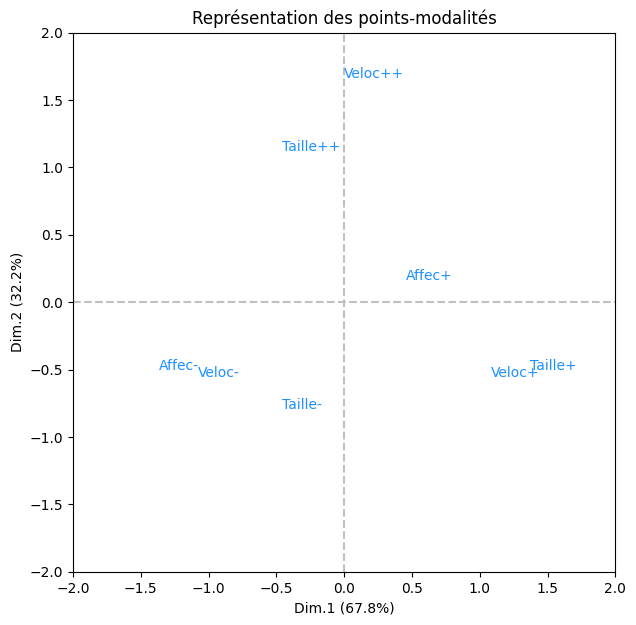

In [ ]:
#représentation dans le plan
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (67.8%)")
ax.set_ylabel("Dim.2 (32.2%)")
plt.title("Représentation des points-modalités")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')

plt.show()

# Contributions



In [ ]:
#affichage des contributions
print(pandas.DataFrame(acm.col_contrib_[:,:2],index=X.columns,columns=['Contrib.F1','Contrib.F2']))

            Contrib.F1  Contrib.F2
Taille+   2.201396e+01    3.532865
Taille++  3.668993e+00   26.602515
Taille-   3.668993e+00   13.126725
Veloc+    2.064806e+01    6.503426
Veloc++   1.232595e-30   39.020556
Veloc-    2.064806e+01    6.503426
Affec+    7.337985e+00    1.177622
Affec-    2.201396e+01    3.532865


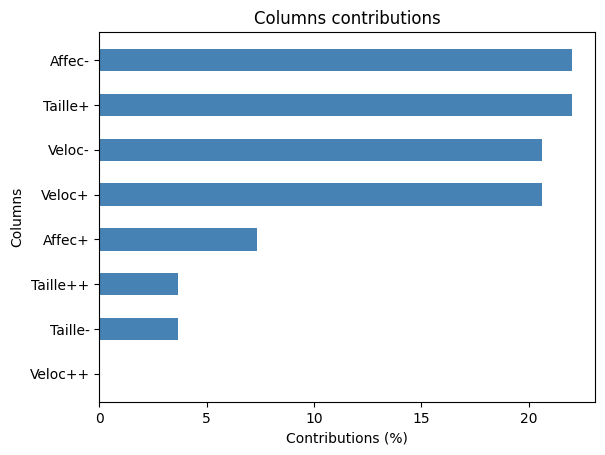

In [ ]:
#ou bien graphiquement
acm.plot_col_contrib(num_axis=1)


## COS2

In [ ]:
#affichage des COS2
print(pandas.DataFrame(acm.col_cos2_[:,:2],index=X.columns,columns=['Cos2.F1','Cos2.F2']))

               Cos2.F1   Cos2.F2
Taille+   6.234628e-01  0.083586
Taille++  1.246926e-01  0.755285
Taille-   1.246926e-01  0.372687
Veloc+    7.017346e-01  0.184642
Veloc++   3.490864e-32  0.923210
Veloc-    7.017346e-01  0.184642
Affec+    6.234628e-01  0.083586
Affec-    6.234628e-01  0.083586


In [ ]:
#affichage des COS2 cumulés
print(pandas.DataFrame(numpy.cumsum(acm.col_cos2_[:,:2],axis=1),index=X.columns,columns=['Cos2.F1','Cum(Cos2).F2']))

               Cos2.F1  Cum(Cos2).F2
Taille+   6.234628e-01      0.707049
Taille++  1.246926e-01      0.879978
Taille-   1.246926e-01      0.497380
Veloc+    7.017346e-01      0.886377
Veloc++   3.490864e-32      0.923210
Veloc-    7.017346e-01      0.886377
Affec+    6.234628e-01      0.707049
Affec-    6.234628e-01      0.707049


on a les COS2 cumulés sur le 2nd facteur, à part (« Taille- » avec Cumul(COS2) =
0.49), les modalités sont assez bien représentées, signe que les deux premiers facteurs
suffisent amplement pour capter l’information portée par les données.

# Valeur test

In [ ]:
print(X)

   Taille+  Taille++  Taille-  Veloc+  Veloc++  Veloc-  Affec+  Affec-
0        0         1        0       0        1       0       1       0
1        0         0        1       0        0       1       0       1
2        0         1        0       0        1       0       1       0
3        1         0        0       1        0       0       1       0
4        0         0        1       0        0       1       1       0
5        0         1        0       0        0       1       0       1
6        0         0        1       1        0       0       1       0
7        1         0        0       1        0       0       1       0


In [ ]:
#effectifs par modalité
print(acm.c_)

[[2. 3. 3. 3. 2. 3. 6. 2.]]


In [ ]:
#calul des valeurs test par modalité - 1er facteur
vtest = acm.col_coord_[:,0]*numpy.sqrt(((n-1)*acm.c_[0])/(n-acm.c_[0]))
print(pandas.DataFrame(vtest,index=X.columns))

                     0
Taille+   2.089076e+00
Taille++ -9.342633e-01
Taille-  -9.342633e-01
Veloc+    2.216335e+00
Veloc++  -4.943283e-16
Veloc-   -2.216335e+00
Affec+    2.089076e+00
Affec-   -2.089076e+00


# Rapport de corrélation

In [ ]:
#récupération des contribution sous une forme exploitable - 2 facteurs
contrib12 = pandas.DataFrame(acm.col_contrib_[:,:2],index=X.columns)
print(contrib12)

                     0          1
Taille+   2.201396e+01   3.532865
Taille++  3.668993e+00  26.602515
Taille-   3.668993e+00  13.126725
Veloc+    2.064806e+01   6.503426
Veloc++   1.232595e-30  39.020556
Veloc-    2.064806e+01   6.503426
Affec+    7.337985e+00   1.177622
Affec-    2.201396e+01   3.532865


# Analyse des individus

Coordonnées factorielles

In [ ]:
#coordonnées des individus dans le plan
print(pandas.DataFrame(acm.row_coord_[:,:2],index=X.index,columns=['Coord.F1','Coord.F2']))

       Coord.F1  Coord.F2
0  0.000000e+00  1.279924
1 -1.150779e+00 -0.799057
2 -3.963444e-16  1.279924
3  1.150779e+00 -0.385124
4 -4.284137e-01 -0.509675
5 -1.150779e+00  0.028809
6  4.284137e-01 -0.509675
7  1.150779e+00 -0.385124


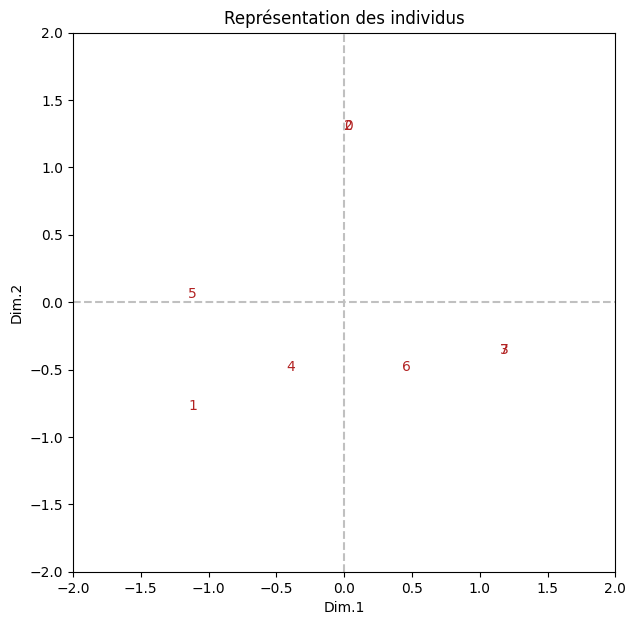

In [ ]:
#représentation des individus dans le plan
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation des individus")

for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')

plt.show()

# la contribution

In [ ]:
#afficher les contributions
print(pandas.DataFrame(acm.row_contrib_[:,:2],index=X.index,columns=['Contrib.F1',
 'Contrib.F2']))

     Contrib.F1  Contrib.F2
0  0.000000e+00   34.620365
1  2.337985e+01   13.493329
2  2.773339e-30   34.620365
3  2.337985e+01    3.134479
4  3.240293e+00    5.489722
5  2.337985e+01    0.017539
6  3.240293e+00    5.489722
7  2.337985e+01    3.134479


# COS2

In [ ]:
#affichage des COS2
print(pandas.DataFrame(acm.row_cos2_[:,:2],index=X.index,columns=['Cos2.F1','Cos2.F2']))

        Cos2.F1   Cos2.F2
0  0.000000e+00  0.982924
1  6.272969e-01  0.302444
2  9.425332e-32  0.982924
3  7.945760e-01  0.088993
4  1.501677e-01  0.212538
5  6.272969e-01  0.000393
6  1.501677e-01  0.212538
7  7.945760e-01  0.088993


In [ ]:
#affichage des COS2 cumulés
print(pandas.DataFrame(numpy.cumsum(acm.row_cos2_[:,:2],axis=1),index=X.index,columns=['Cos2.F1','Cum(Cos2).F2']))

        Cos2.F1  Cum(Cos2).F2
0  0.000000e+00      0.982924
1  6.272969e-01      0.929741
2  9.425332e-32      0.982924
3  7.945760e-01      0.883569
4  1.501677e-01      0.362706
5  6.272969e-01      0.627690
6  1.501677e-01      0.362706
7  7.945760e-01      0.883569
